In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
os.getcwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv')
Data_Day.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# EXPLORATORY DATA ANALYSIS

In [5]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [6]:
Data_Day.info

<bound method DataFrame.info of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

In [7]:
Data_Day.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Data Types of Varaibles
print(Data_Day.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#Dimension
Data_Day.shape

(1470, 35)

In [10]:
# Index range
Data_Day.index

RangeIndex(start=0, stop=1470, step=1)

In [11]:
#columns 
Data_Day.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
categorical_var = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',  'Over18', 'OverTime','PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
# Encode Categorical Columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data_Day[categorical_var] = Data_Day[categorical_var].apply(le.fit_transform)
Data_Day

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,1,1,1,0,94,2,1,7,3,2,5993,19479,8,0,1,11,0,0,80,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,0,1,1,2,2,1,61,1,1,6,1,1,5130,24907,1,0,0,23,1,3,80,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,1,4,1,4,3,1,92,1,0,2,2,2,2090,2396,6,0,1,15,0,1,80,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,3,1,1,5,3,0,56,2,0,6,2,1,2909,23159,1,0,1,11,0,2,80,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,0,3,1,7,0,1,40,2,0,2,1,1,3468,16632,9,0,0,12,0,3,80,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,1,3,1,2061,2,1,41,3,1,2,3,1,2571,12290,4,0,0,17,0,2,80,1,17,3,2,5,2,0,3
1466,39,0,2,613,1,6,0,3,1,2062,3,1,42,1,2,0,0,1,9991,21457,4,0,0,15,0,0,80,1,9,5,2,7,7,1,7
1467,27,0,2,155,1,4,2,1,1,2064,1,1,87,3,1,4,1,1,6142,5174,1,0,1,20,1,1,80,1,6,0,2,6,2,0,3
1468,49,0,1,1023,2,2,2,3,1,2065,3,1,63,1,1,7,1,1,5390,13243,2,0,0,14,0,3,80,0,17,3,1,9,6,0,8


In [13]:
#unique values present in each variable
Data_Day.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [14]:
#Defining numeric and categorical variables and saving in specific array
var = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
numeric_var = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 
               'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_var = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',  'Over18', 'OverTime','PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# DATA PRE PROCESSING

In [15]:
#sum of missing values 
Data_Day.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
#Outlier analysis

Age


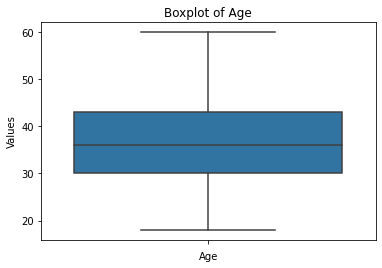

DailyRate


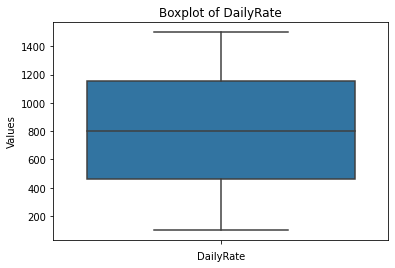

DistanceFromHome


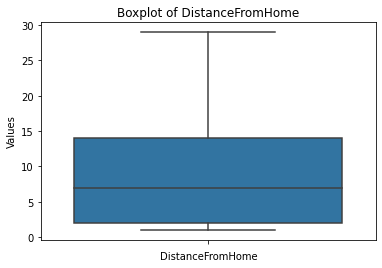

EmployeeCount


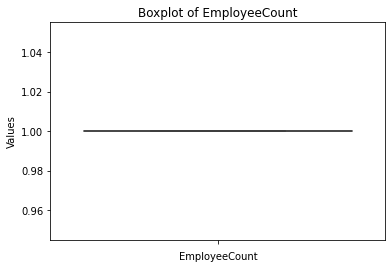

EmployeeNumber


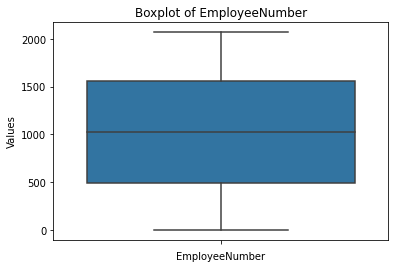

HourlyRate


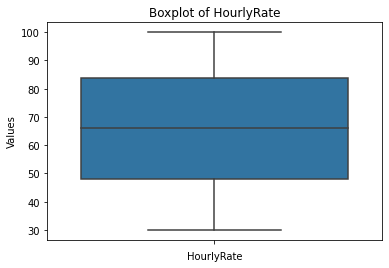

MonthlyIncome


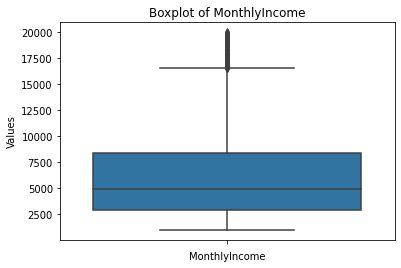

MonthlyRate


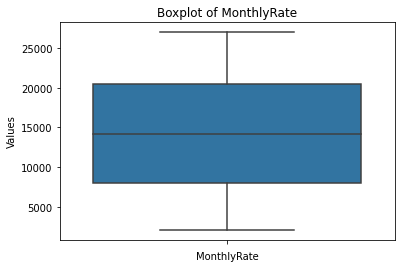

NumCompaniesWorked


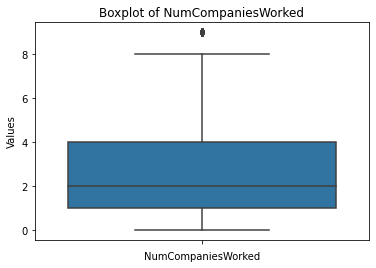

PercentSalaryHike


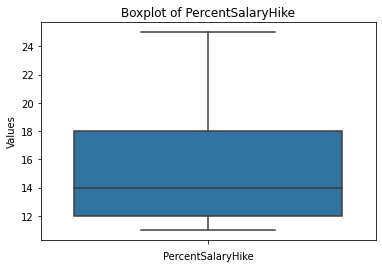

StandardHours


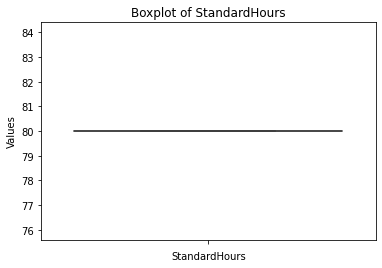

TotalWorkingYears


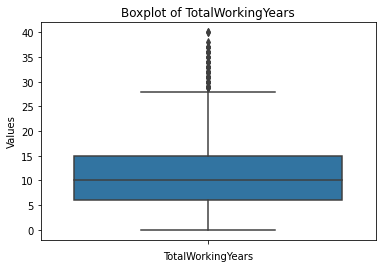

TrainingTimesLastYear


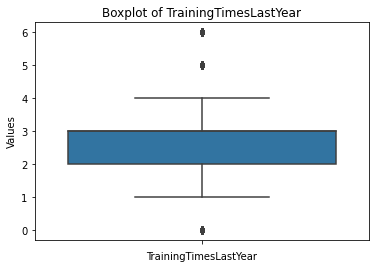

YearsAtCompany


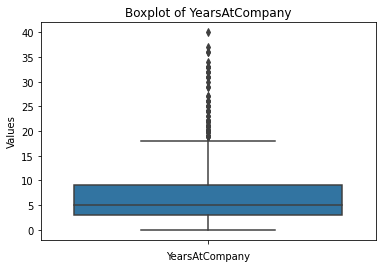

YearsInCurrentRole


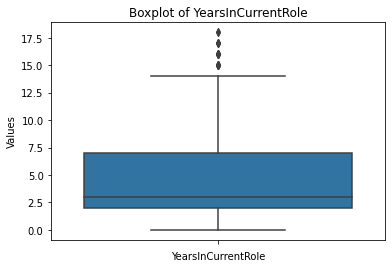

YearsSinceLastPromotion


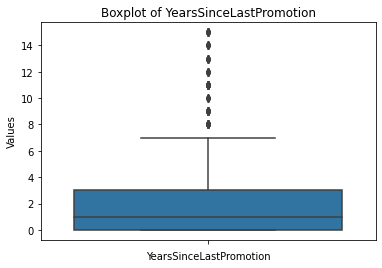

YearsWithCurrManager


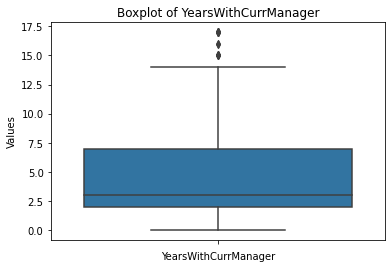

In [17]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

***We are getting some outliers in the above graphs.***

In [18]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

Age
Innerfence= 10.5
Upperfence= 62.5
IQR =13.0
DailyRate
Innerfence= -573.0
Upperfence= 2195.0
IQR =692.0
DistanceFromHome
Innerfence= -16.0
Upperfence= 32.0
IQR =12.0
EmployeeCount
Innerfence= 1.0
Upperfence= 1.0
IQR =0.0
EmployeeNumber
Innerfence= -1105.5
Upperfence= 3152.5
IQR =1064.5
HourlyRate
Innerfence= -5.625
Upperfence= 137.375
IQR =35.75
MonthlyIncome
Innerfence= -5291.0
Upperfence= 16581.0
IQR =5468.0
MonthlyRate
Innerfence= -10574.75
Upperfence= 39083.25
IQR =12414.5
NumCompaniesWorked
Innerfence= -3.5
Upperfence= 8.5
IQR =3.0
PercentSalaryHike
Innerfence= 3.0
Upperfence= 27.0
IQR =6.0
StandardHours
Innerfence= 80.0
Upperfence= 80.0
IQR =0.0
TotalWorkingYears
Innerfence= -7.5
Upperfence= 28.5
IQR =9.0
TrainingTimesLastYear
Innerfence= 0.5
Upperfence= 4.5
IQR =1.0
YearsAtCompany
Innerfence= -6.0
Upperfence= 18.0
IQR =6.0
YearsInCurrentRole
Innerfence= -5.5
Upperfence= 14.5
IQR =5.0
YearsSinceLastPromotion
Innerfence= -4.5
Upperfence= 7.5
IQR =3.0
YearsWithCurrManager
Innerf

In [19]:
!pip install klib

GridSpec(6, 6)

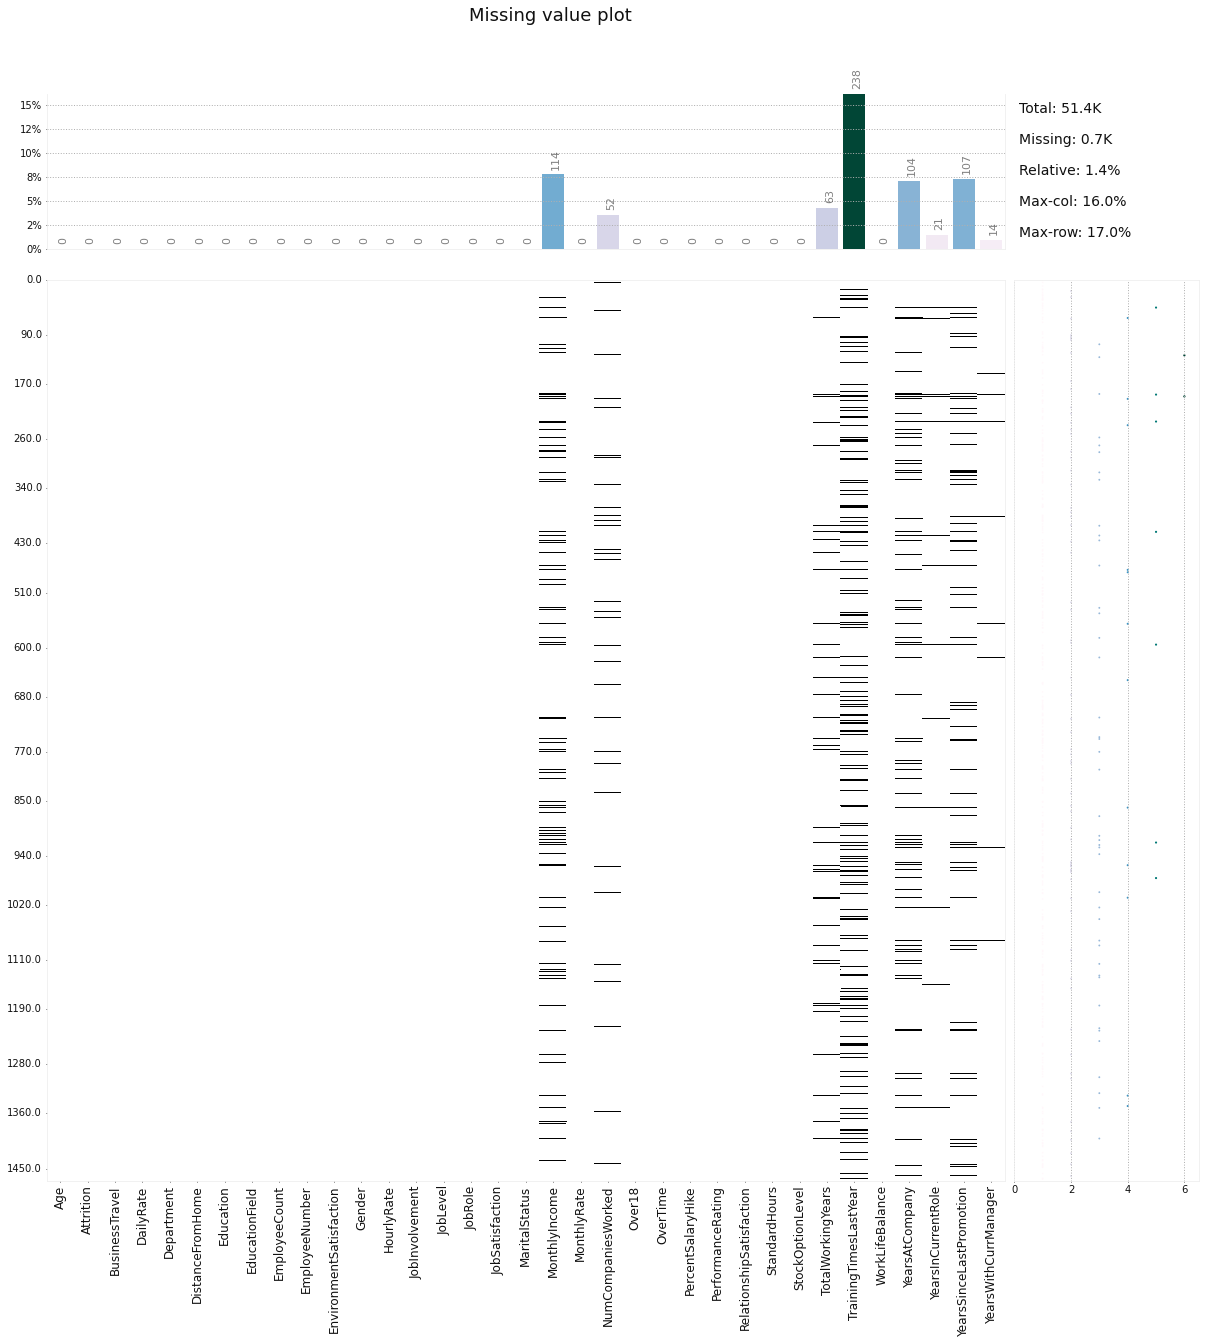

In [20]:
import klib
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value

In [21]:
# Check NA Values
Data_Day.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtC

In [22]:
# total 10 outliers found. Now, impute the values, by the help of median.
Data_Day['MonthlyIncome'] = Data_Day['MonthlyIncome'].fillna(Data_Day['MonthlyIncome'].mean()).round()
Data_Day['NumCompaniesWorked'] = Data_Day['NumCompaniesWorked'].fillna(Data_Day['NumCompaniesWorked'].median()).round()
Data_Day['TotalWorkingYears'] = Data_Day['TotalWorkingYears'].fillna(Data_Day['TotalWorkingYears'].median()).round()
Data_Day['TrainingTimesLastYear'] = Data_Day['TrainingTimesLastYear'].fillna(Data_Day['TrainingTimesLastYear'].median()).round()
Data_Day['YearsAtCompany'] = Data_Day['YearsAtCompany'].fillna(Data_Day['YearsAtCompany'].median()).round()
Data_Day['YearsInCurrentRole'] = Data_Day['YearsInCurrentRole'].fillna(Data_Day['YearsInCurrentRole'].median()).round()
Data_Day['YearsSinceLastPromotion'] = Data_Day['YearsSinceLastPromotion'].fillna(Data_Day['YearsSinceLastPromotion'].median()).round()
Data_Day['YearsWithCurrManager'] = Data_Day['YearsWithCurrManager'].fillna(Data_Day['YearsWithCurrManager'].median()).round()
Data_Day.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,1102.0,2,1.0,1,1,1.0,1.0,1,0,94.0,2,1,7,3,2,5993.0,19479.0,8.0,0,1,11.0,0,0,80.0,0,8.0,2.0,0,6.0,4.0,0.0,5.0
1,49.0,0,1,279.0,1,8.0,0,1,1.0,2.0,2,1,61.0,1,1,6,1,1,5130.0,24907.0,1.0,0,0,23.0,1,3,80.0,1,10.0,3.0,2,10.0,7.0,1.0,7.0
2,37.0,1,2,1373.0,1,2.0,1,4,1.0,4.0,3,1,92.0,1,0,2,2,2,2090.0,2396.0,6.0,0,1,15.0,0,1,80.0,0,7.0,3.0,2,0.0,0.0,0.0,0.0
3,33.0,0,1,1392.0,1,3.0,3,1,1.0,5.0,3,0,56.0,2,0,6,2,1,2909.0,23159.0,1.0,0,1,11.0,0,2,80.0,0,8.0,3.0,2,8.0,7.0,3.0,0.0
4,27.0,0,2,591.0,1,2.0,0,3,1.0,7.0,0,1,40.0,2,0,2,1,1,3468.0,16632.0,1.0,0,0,12.0,0,3,80.0,1,6.0,3.0,2,2.0,2.0,2.0,2.0


In [23]:
# Check NA Values
Data_Day.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [24]:
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value
Data_Day.isnull().sum()

No missing values found in the dataset.


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

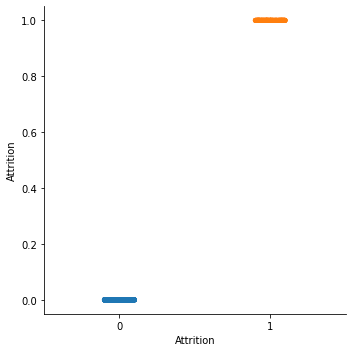

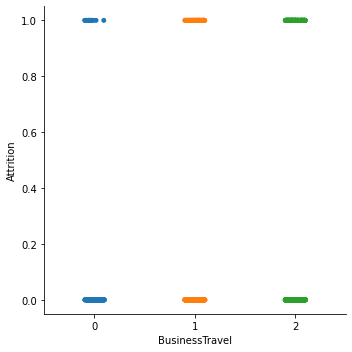

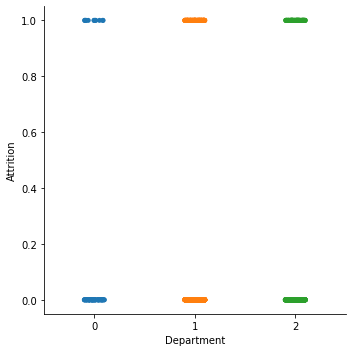

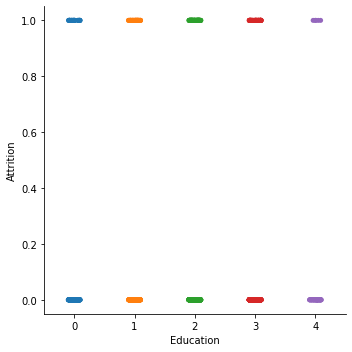

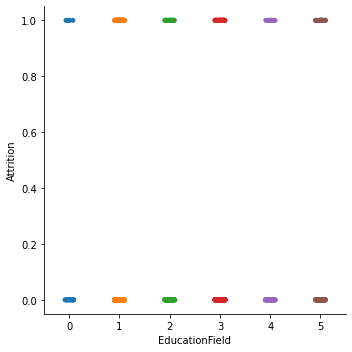

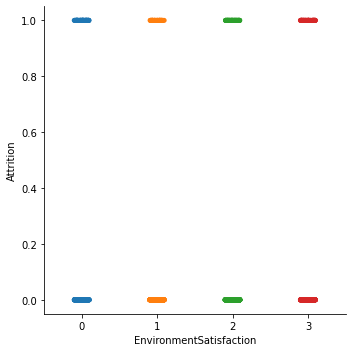

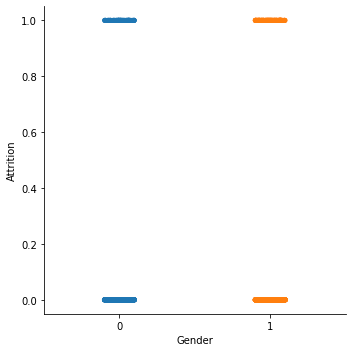

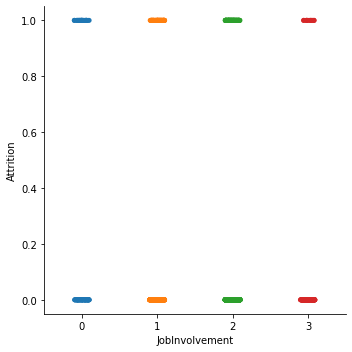

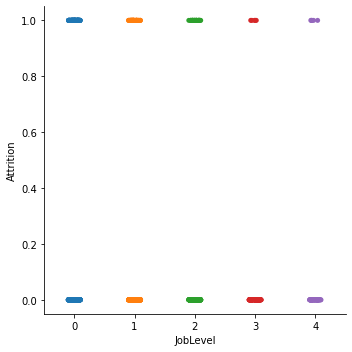

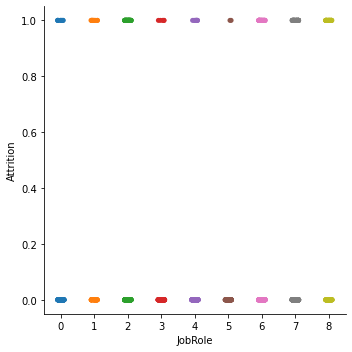

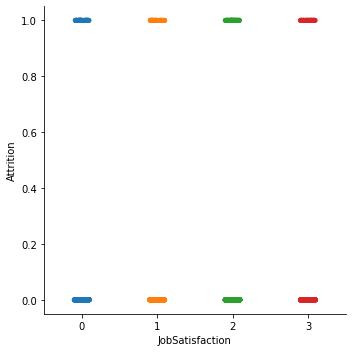

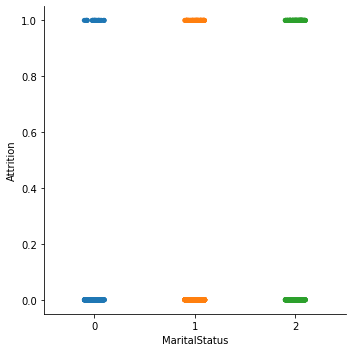

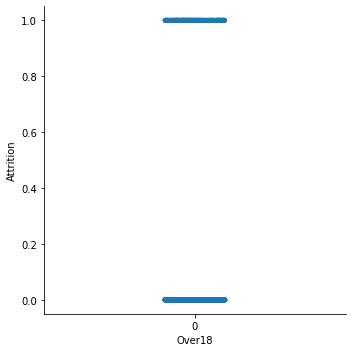

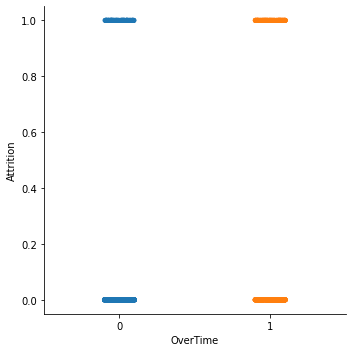

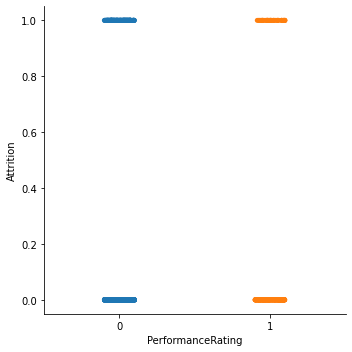

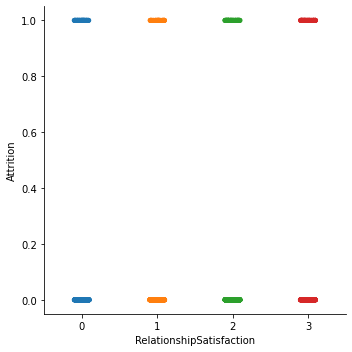

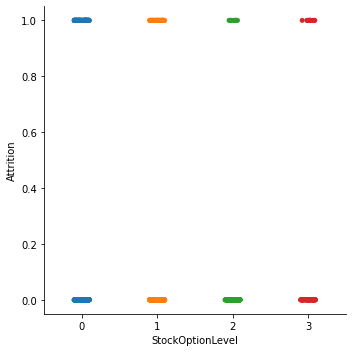

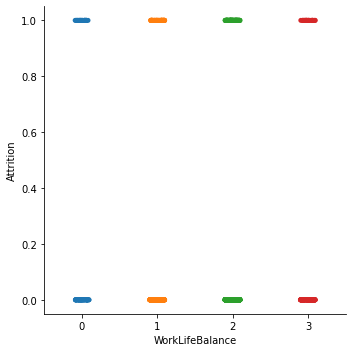

In [25]:
for i in categorical_var:
  sns.catplot(x = i, y = "Attrition", data=Data_Day, linewidths=.15)

                               Age  ...  YearsWithCurrManager
Age                       1.000000  ...              0.183258
Attrition                -0.159205  ...             -0.149184
BusinessTravel            0.024751  ...             -0.045918
DailyRate                 0.010661  ...             -0.009974
Department               -0.031882  ...              0.038978
DistanceFromHome         -0.001686  ...              0.003779
Education                 0.208034  ...              0.053826
EducationField           -0.040873  ...             -0.001557
EmployeeCount                  NaN  ...                   NaN
EmployeeNumber           -0.010145  ...              0.004505
EnvironmentSatisfaction   0.010146  ...             -0.008105
Gender                   -0.036311  ...             -0.034727
HourlyRate                0.024287  ...             -0.005939
JobInvolvement            0.029820  ...              0.025051
JobLevel                  0.509604  ...              0.358104
JobRole 

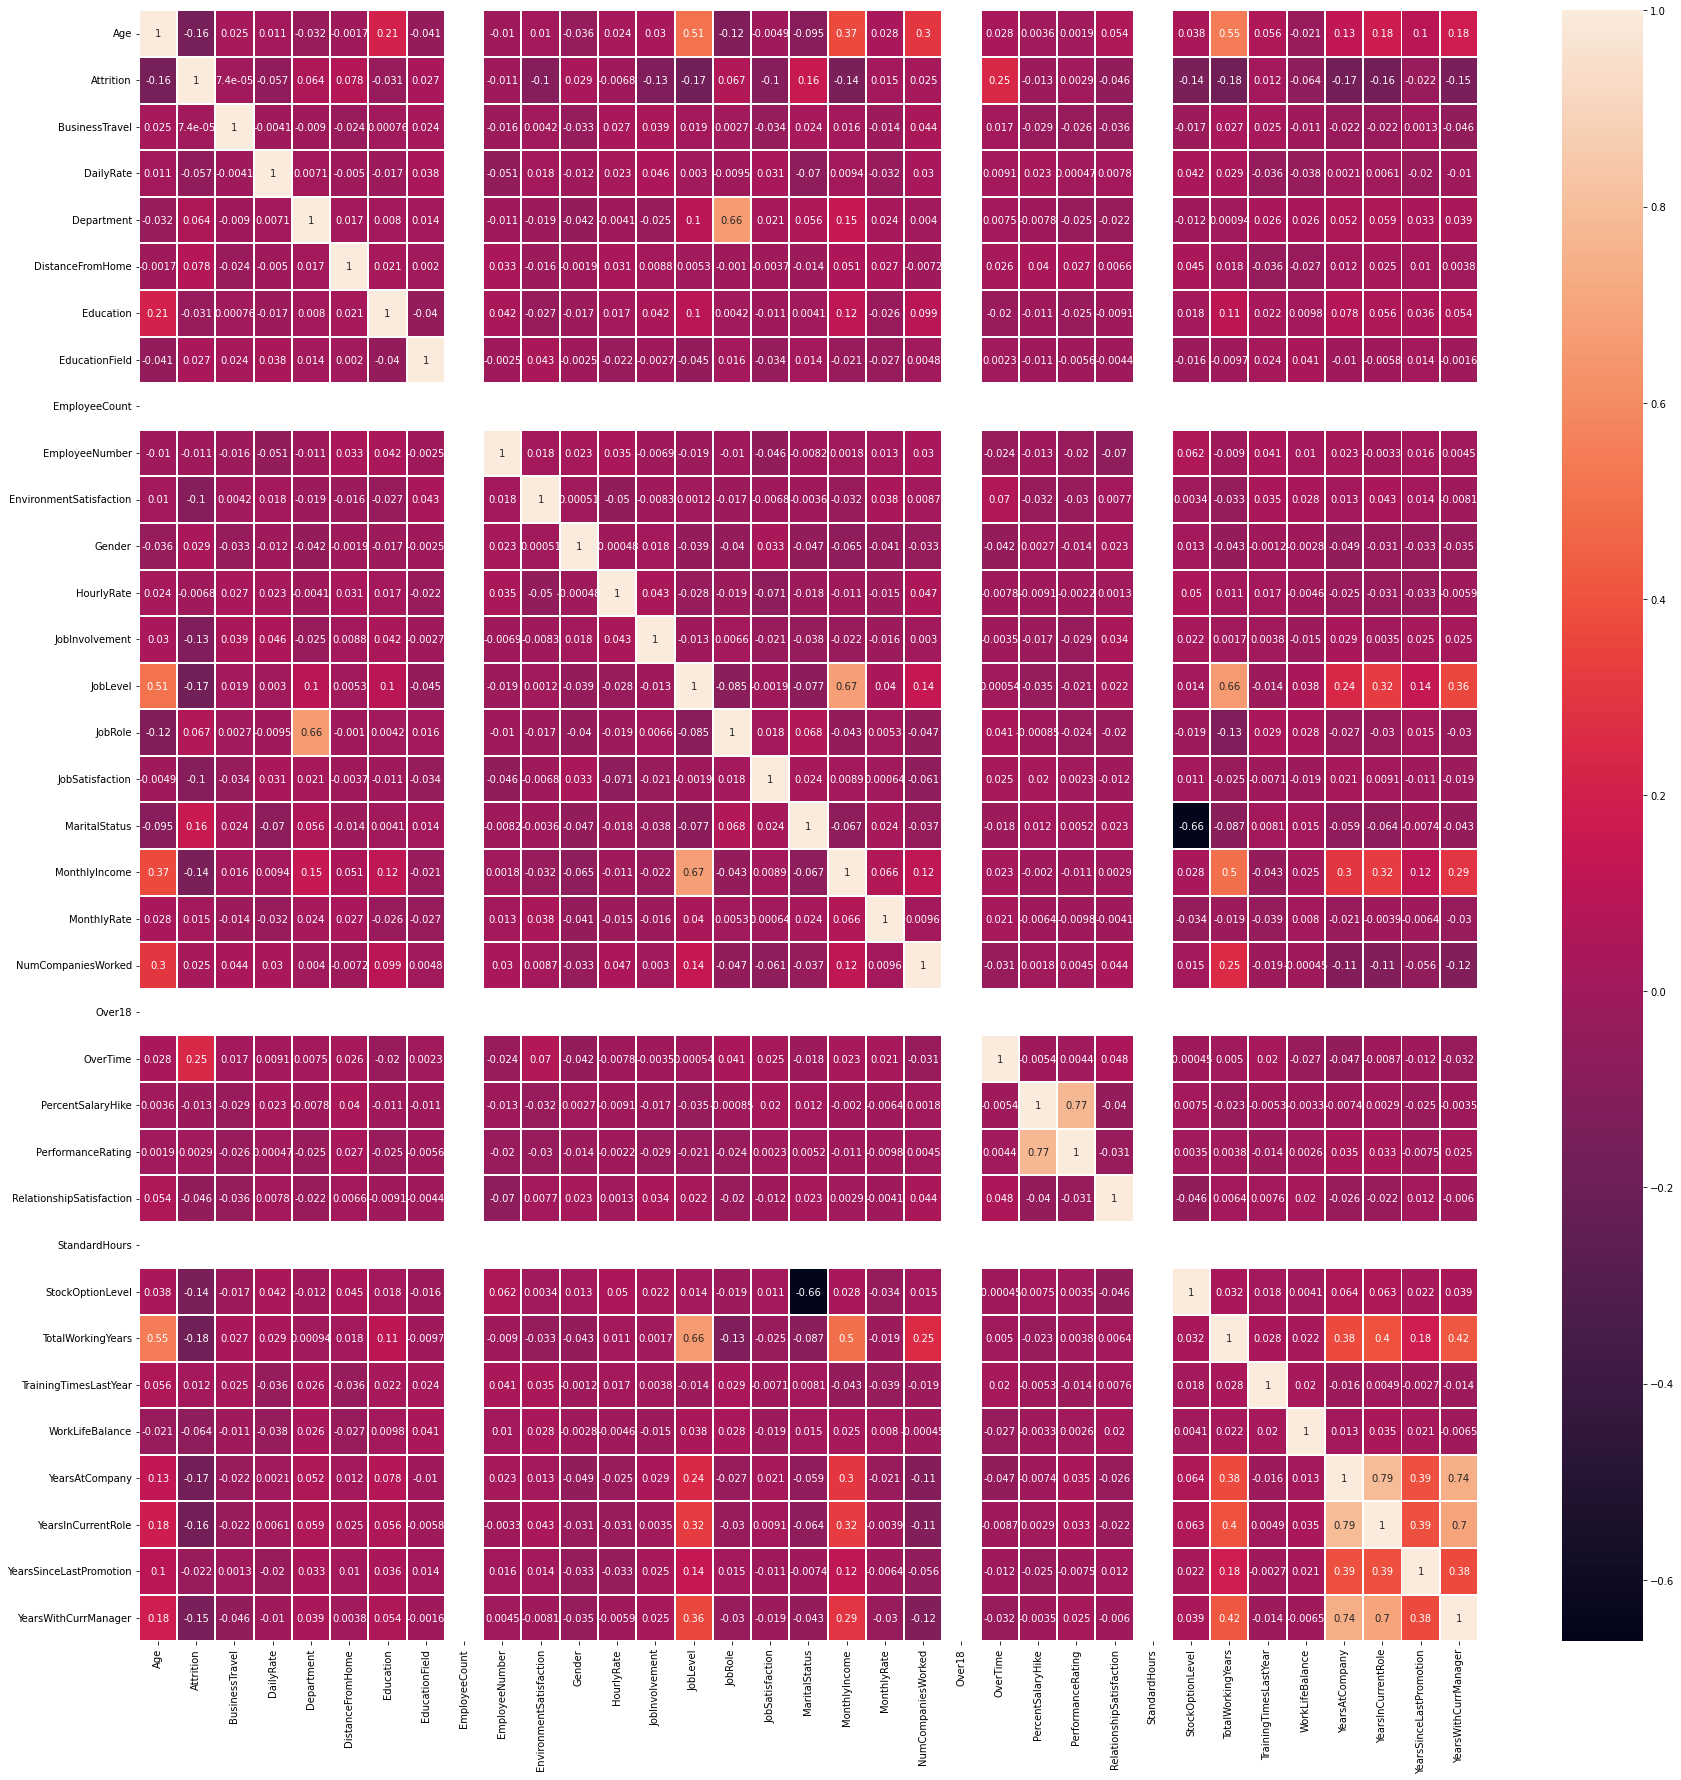

In [26]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
Data_Day_cor = Data_Day.loc[:, var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(30,30)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=1)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


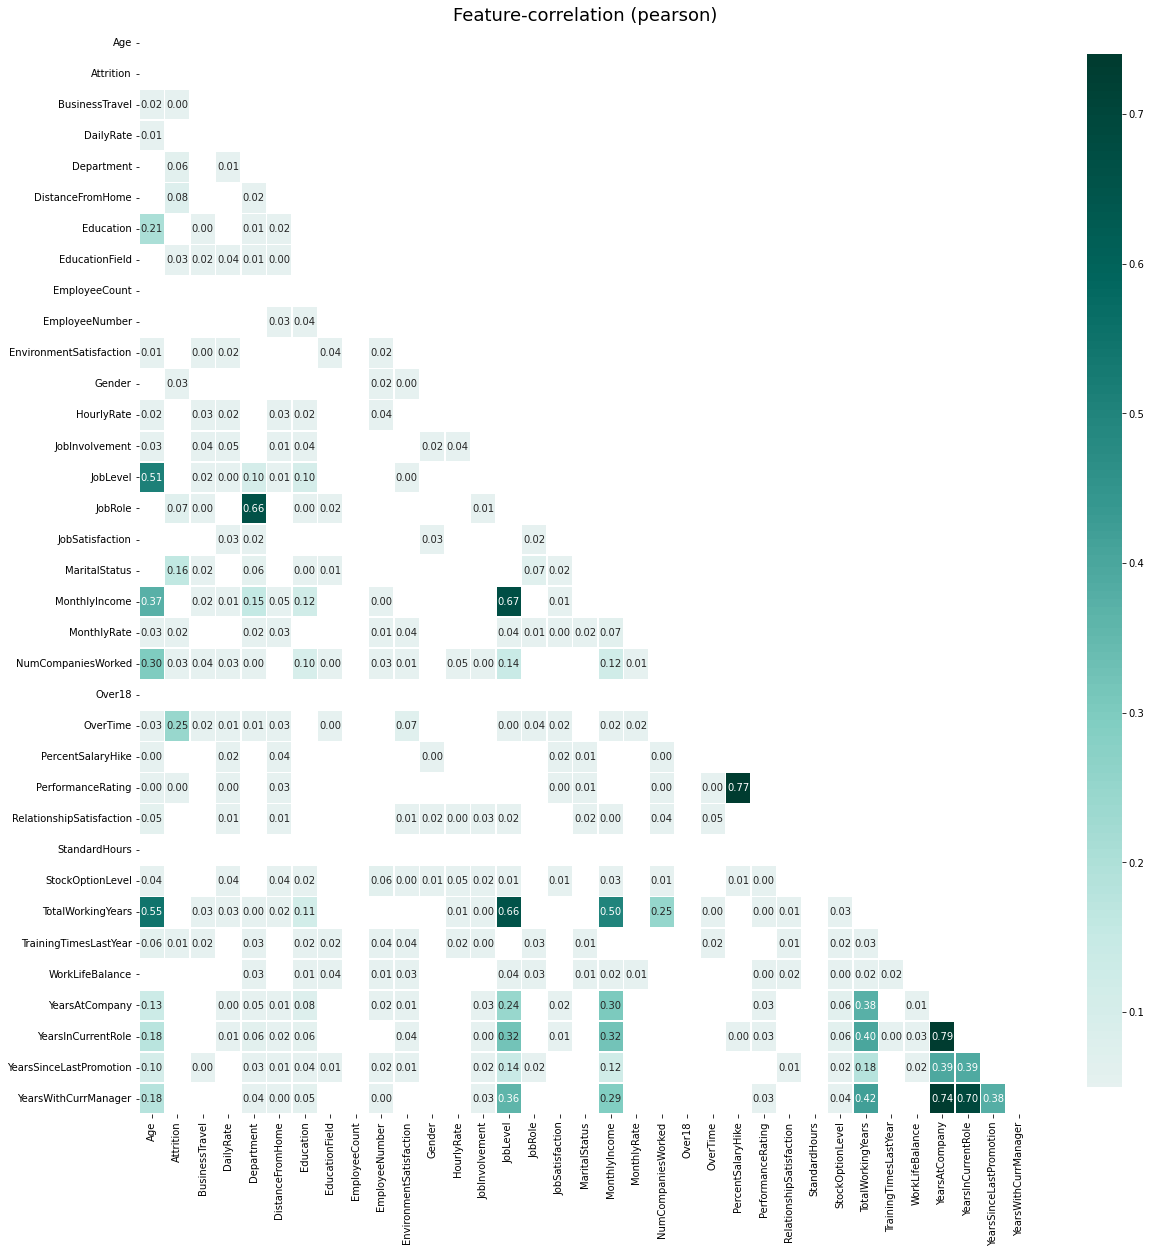

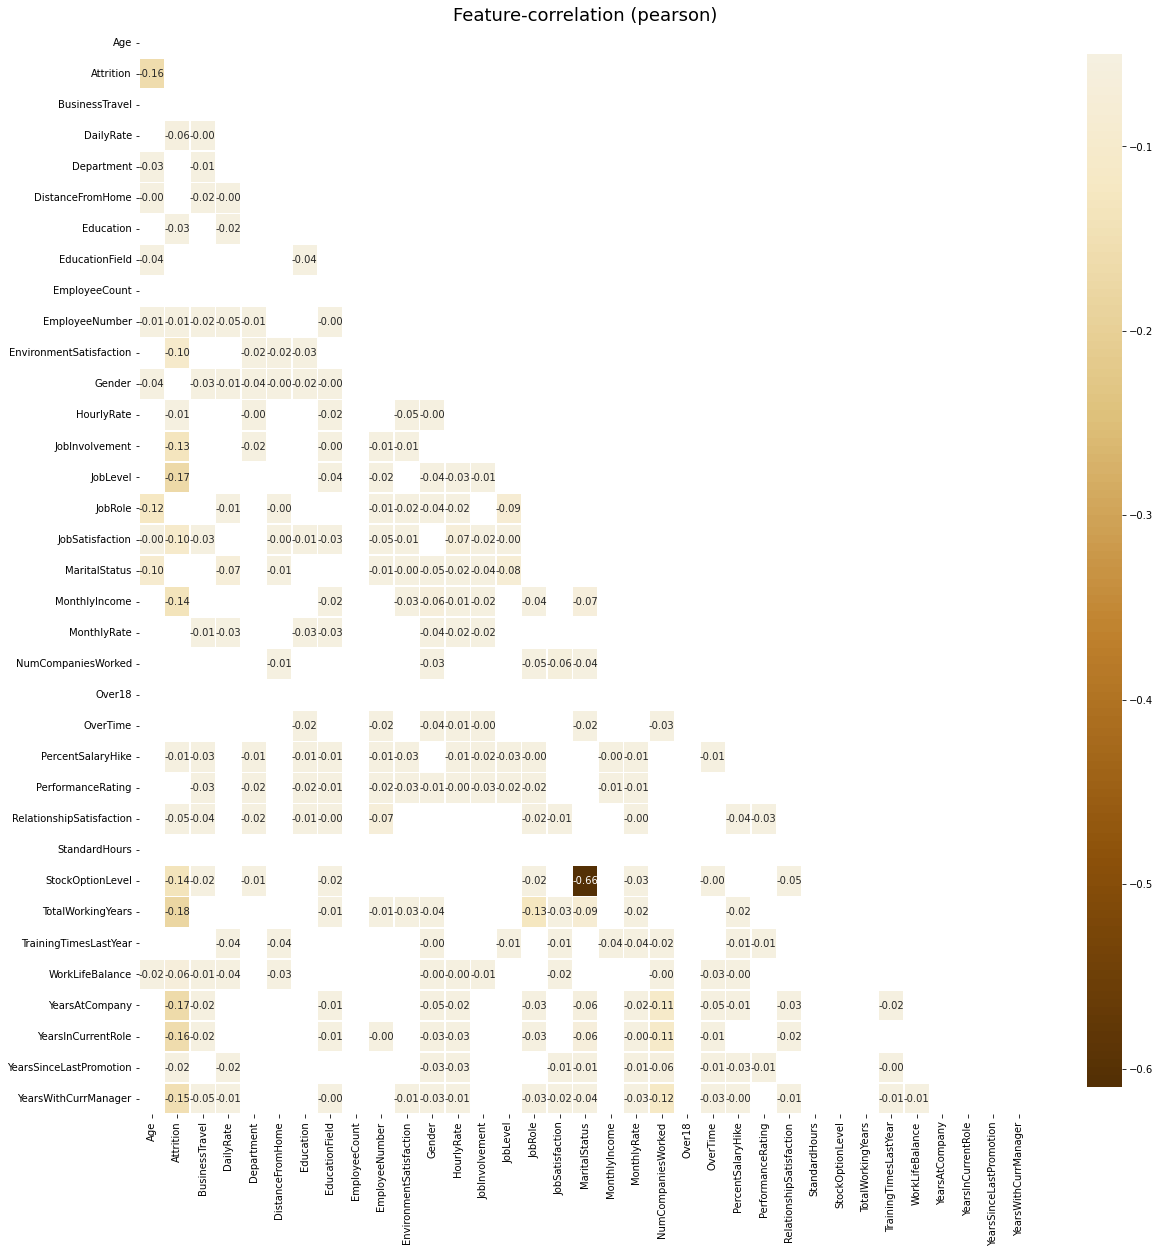

In [27]:
klib.corr_plot(Data_Day, split="pos", figsize=(20,20))
klib.corr_plot(Data_Day, split="neg", figsize=(20,20))

So in this way upon having the look at correlation graph we can eaisly infer that EmployeeCount, Over18, StandardHours has no relationship bond with anyother variable in the dataframe. Rest all the variables in the dataframe has relationships well between the yield range.

In [28]:
Data_Day.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,1.912925,2.247619,1.0,1024.865306,1.721769,0.600000,65.891156,1.729932,1.063946,4.458503,1.728571,1.097279,5502.781633,14313.103401,2.410204,0.0,0.282993,15.209524,0.153741,1.712245,80.0,0.793878,10.267347,2.453061,1.761224,5.697959,4.043537,1.449660,3.997959
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,3188.434184,7117.786044,2.203044,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,6.313240,0.715605,0.706476,3.881314,3.334660,1.927158,3.367950
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,0.000000,0.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,1.000000,1.000000,1.0,491.250000,1.000000,0.000000,48.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,0.000000,1.000000,80.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,2.000000,2.000000,1.0,1020.500000,2.000000,1.000000,66.000000,2.000000,1.000000,5.000000,2.000000,1.000000,4919.000000,14235.500000,1.000000,0.0,0.000000,14.000000,0.000000,2.000000,80.0,1.000000,9.000000,2.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,3.000000,3.000000,1.0,1555.750000,3.000000,1.000000,83.750000,2.000000,2.000000,7.000000,3.000000,2.000000,6581.000000,20461.500000,4.000000,0.0,1.000000,18.000000,0.000000,3.000000,80.0,1.000000,13.000000,3.000000,2.000000,8.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,4.000000,5.000000,1.0,2068.000000,3.000000,1.000000,100.000000,3.000000,4.000000,8.000000,3.000000,2.000000,16555.000000,26999.000000,8.000000,0.0,1.000000,25.000000,1.000000,3.000000,80.0,3.000000,28.000000,4.000000,3.000000,18.000000,14.000000,7.000000,14.000000


In [29]:
Data_Day.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis='columns', inplace = True)
Data_Day

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,1102.0,2,1.0,1,1,1.0,1,0,94.0,2,1,7,3,2,5993.0,19479.0,8.0,1,11.0,0,0,0,8.0,2.0,0,6.0,4.0,0.0,5.0
1,49.0,0,1,279.0,1,8.0,0,1,2.0,2,1,61.0,1,1,6,1,1,5130.0,24907.0,1.0,0,23.0,1,3,1,10.0,3.0,2,10.0,7.0,1.0,7.0
2,37.0,1,2,1373.0,1,2.0,1,4,4.0,3,1,92.0,1,0,2,2,2,2090.0,2396.0,6.0,1,15.0,0,1,0,7.0,3.0,2,0.0,0.0,0.0,0.0
3,33.0,0,1,1392.0,1,3.0,3,1,5.0,3,0,56.0,2,0,6,2,1,2909.0,23159.0,1.0,1,11.0,0,2,0,8.0,3.0,2,8.0,7.0,3.0,0.0
4,27.0,0,2,591.0,1,2.0,0,3,7.0,0,1,40.0,2,0,2,1,1,3468.0,16632.0,1.0,0,12.0,0,3,1,6.0,3.0,2,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,0,1,884.0,1,23.0,1,3,2061.0,2,1,41.0,3,1,2,3,1,2571.0,12290.0,4.0,0,17.0,0,2,1,17.0,3.0,2,5.0,2.0,0.0,3.0
1466,39.0,0,2,613.0,1,6.0,0,3,2062.0,3,1,42.0,1,2,0,0,1,9991.0,21457.0,4.0,0,15.0,0,0,1,9.0,2.0,2,7.0,7.0,1.0,7.0
1467,27.0,0,2,155.0,1,4.0,2,1,2064.0,1,1,87.0,3,1,4,1,1,6142.0,5174.0,1.0,1,20.0,1,1,1,6.0,2.0,2,6.0,2.0,0.0,3.0
1468,49.0,0,1,1023.0,2,2.0,2,3,2065.0,3,1,63.0,1,1,7,1,1,5390.0,13243.0,2.0,0,14.0,0,3,0,17.0,3.0,1,9.0,6.0,0.0,8.0


Note: The number of non binary numerical features is very large (28), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


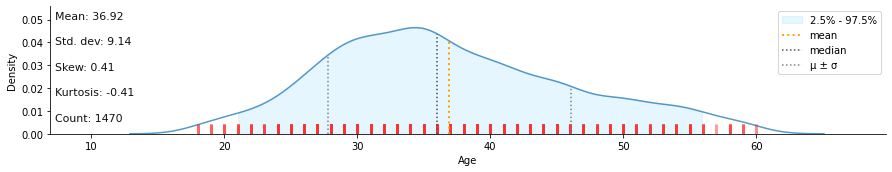

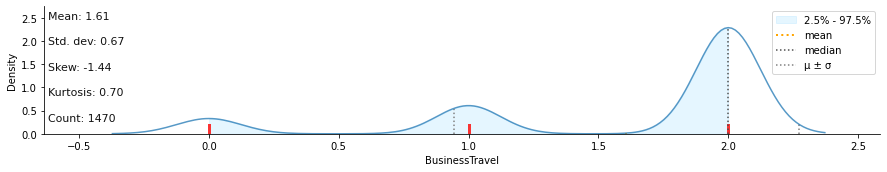

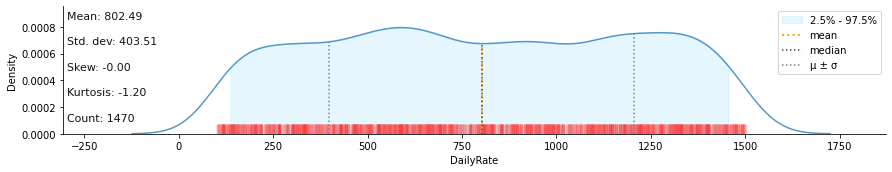

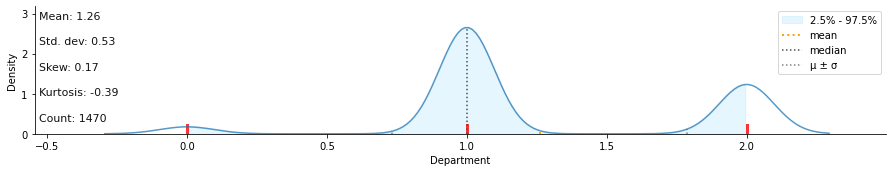

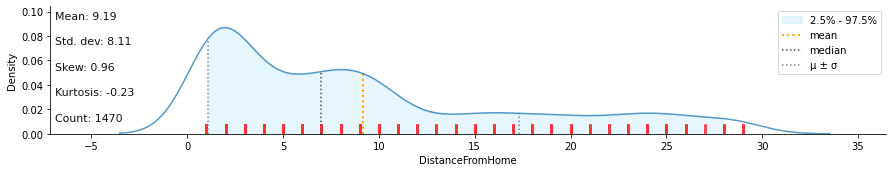

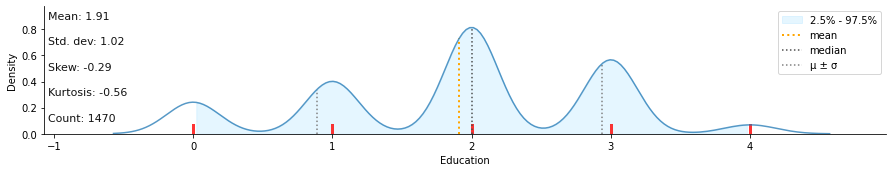

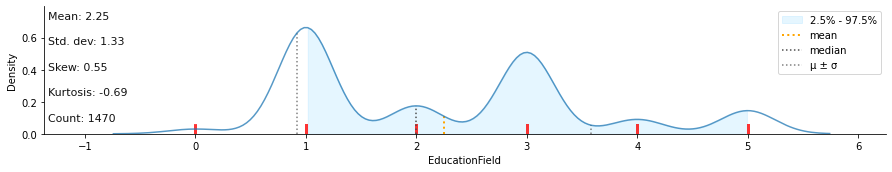

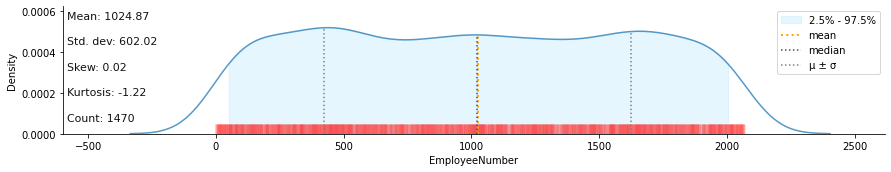

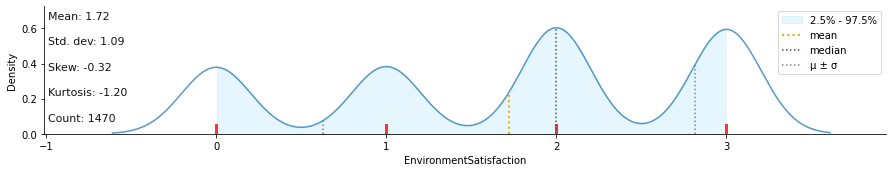

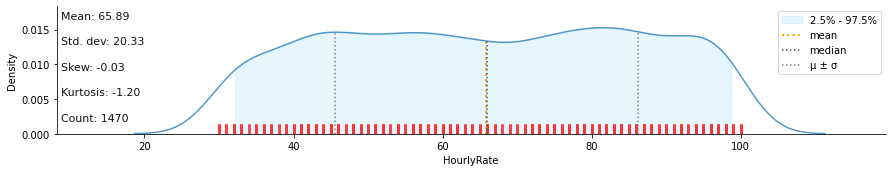

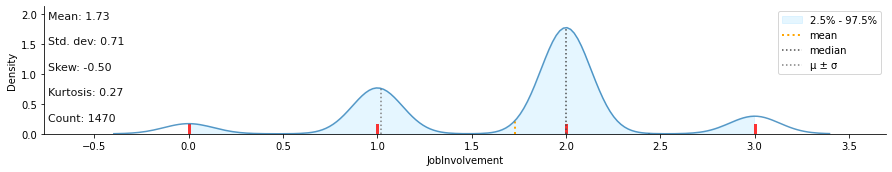

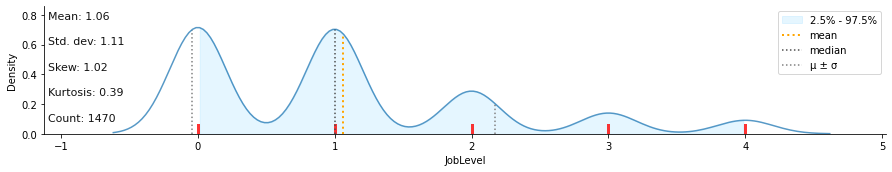

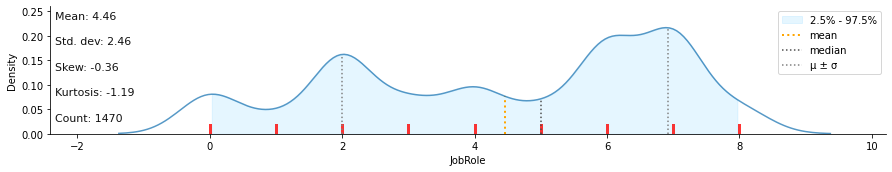

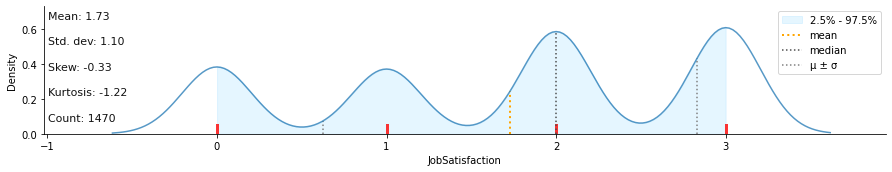

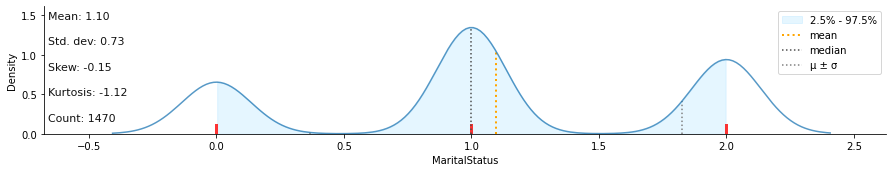

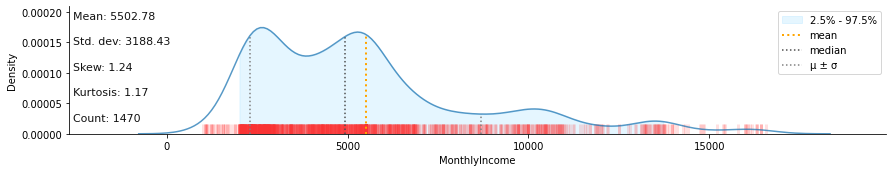

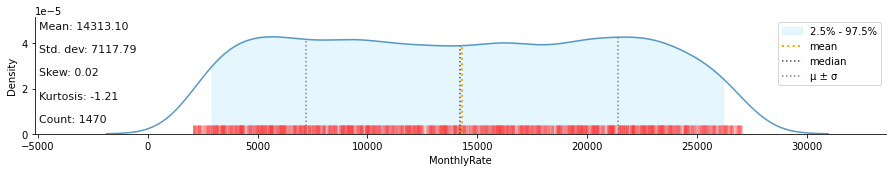

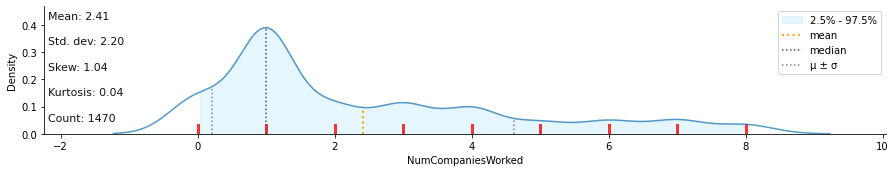

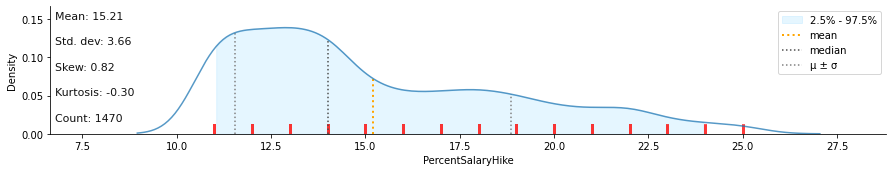

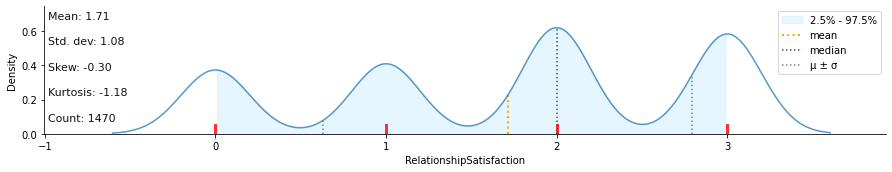

In [30]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distributed  allmost normely in bell curve, except some nitty gritty deviation in some variable.

In [31]:
!pip install pycaret[Full]==2.3. 4

In [32]:
from pycaret.classification import *
exp1 = setup(Data_Day, target = 'Attrition')

,Description,Value
0,session_id,2858
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1470, 32)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8763,0.8431,0.4676,0.7124,0.5570,0.4889,0.5077,0.029
ridge,Ridge Classifier,0.8676,0.0000,0.2869,0.8028,0.4124,0.3575,0.4216,0.018
catboost,CatBoost Classifier,0.8648,0.8030,0.2278,0.8758,0.3466,0.3023,0.3899,3.346
ada,Ada Boost Classifier,0.8628,0.8136,0.4154,0.6455,0.5005,0.4257,0.4419,0.154
gbc,Gradient Boosting Classifier,0.8599,0.7947,0.2987,0.6719,0.4095,0.3450,0.3826,0.334
lightgbm,Light Gradient Boosting Machine,0.8589,0.7901,0.2931,0.6768,0.4010,0.3373,0.3779,0.138
et,Extra Trees Classifier,0.8550,0.8075,0.1817,0.7375,0.2766,0.2354,0.3082,0.506
xgboost,Extreme Gradient Boosting,0.8550,0.7663,0.2752,0.6416,0.3742,0.3113,0.3501,4.376
rf,Random Forest Classifier,0.8521,0.7819,0.1346,0.9000,0.2279,0.1933,0.3034,0.535
lr,Logistic Regression,0.8462,0.7661,0.2163,0.6748,0.3133,0.2510,0.3083,0.604


In [34]:
# check the best model
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [35]:
# predict on hold-out
pred_holdout = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8891,0.8486,0.5152,0.6667,0.5812,0.5185,0.5242


In [36]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8738,0.8550,0.3529,0.7500,0.4800,0.4186,0.4573
1,0.8932,0.8625,0.4118,0.8750,0.5600,0.5080,0.5550
2,0.8641,0.8010,0.1765,1.0000,0.3000,0.2635,0.3896
3,0.8641,0.8817,0.2353,0.8000,0.3636,0.3120,0.3863
4,0.8350,0.7401,0.1176,0.5000,0.1905,0.1362,0.1814
5,0.8738,0.8044,0.2353,1.0000,0.3810,0.3394,0.4521
6,0.8544,0.8051,0.1176,1.0000,0.2105,0.1821,0.3165
7,0.8738,0.8216,0.2778,1.0000,0.4348,0.3883,0.4908
8,0.8431,0.6803,0.0588,1.0000,0.1111,0.0943,0.2225
9,0.8725,0.7785,0.2941,0.8333,0.4348,0.3810,0.4472


In [37]:
tuned_model = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8544,0.8694,0.2353,0.6667,0.3478,0.2864,0.3361
1,0.9029,0.8529,0.4706,0.8889,0.6154,0.5658,0.6033
2,0.8835,0.8550,0.3529,0.8571,0.5000,0.4467,0.5034
3,0.8738,0.8830,0.2941,0.8333,0.4348,0.3815,0.4477
4,0.8544,0.7394,0.1765,0.7500,0.2857,0.2378,0.3167
5,0.8738,0.8283,0.2941,0.8333,0.4348,0.3815,0.4477
6,0.8835,0.8181,0.2941,1.0000,0.4545,0.4103,0.5080
7,0.8738,0.8438,0.2778,1.0000,0.4348,0.3883,0.4908
8,0.8235,0.7370,0.0588,0.3333,0.1000,0.0526,0.0778
9,0.8824,0.7633,0.3529,0.8571,0.5000,0.4462,0.5029


In [38]:
lda_bagged = ensemble_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8641,0.8523,0.2353,0.8000,0.3636,0.3120,0.3863
1,0.8835,0.8625,0.3529,0.8571,0.5000,0.4467,0.5034
2,0.8544,0.8098,0.1176,1.0000,0.2105,0.1821,0.3165
3,0.8350,0.8933,0.0588,0.5000,0.1053,0.0731,0.1270
4,0.8350,0.7538,0.0588,0.5000,0.1053,0.0731,0.1270
5,0.8738,0.8051,0.2353,1.0000,0.3810,0.3394,0.4521
6,0.8544,0.8140,0.1176,1.0000,0.2105,0.1821,0.3165
7,0.8544,0.8471,0.1667,1.0000,0.2857,0.2482,0.3764
8,0.8333,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8824,0.7744,0.2941,1.0000,0.4545,0.4098,0.5077


***Ensembling is not coming usp with better results therefore we may consider tuned_model for further analysis.***

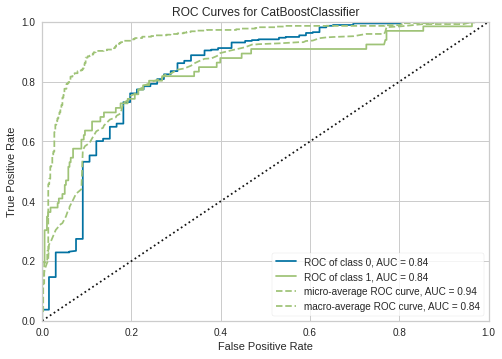

In [39]:
# AUC plot
plot_model(tuned_model, plot = 'auc')

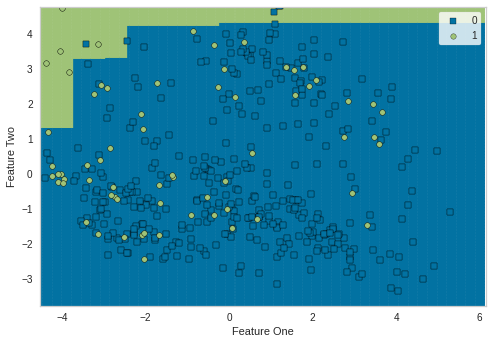

In [40]:
# Decision Boundary
plot_model(tuned_model, plot = 'boundary')

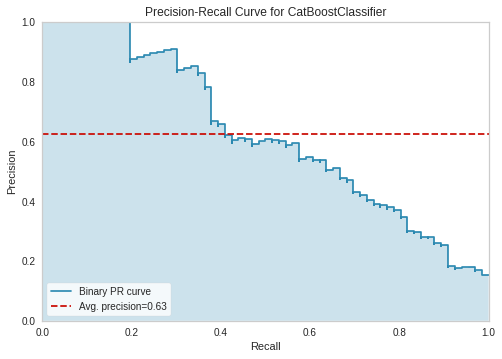

In [41]:
# Precision Recall Curve
plot_model(tuned_model, plot = 'pr')

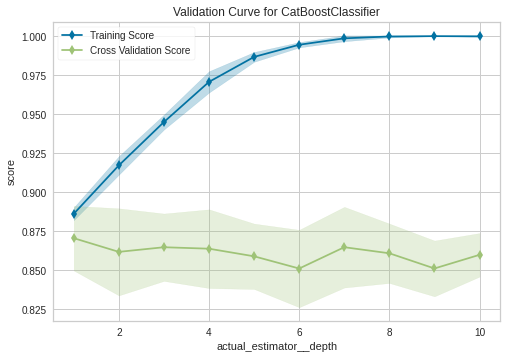

In [42]:
# Validation Curve
plot_model(tuned_model, plot = 'vc')

In [43]:
evaluate_model(chatboost) ###Clicking atr various icons wilkl producs respective graphs

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [44]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***TypeError:*** This function only supports tree based models for binary classification: xgboost, catboost, rf, et, lightgbm, dt.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8738,0.8550,0.3529,0.7500,0.4800,0.4186,0.4573
1,0.8932,0.8625,0.4118,0.8750,0.5600,0.5080,0.5550
2,0.8641,0.8010,0.1765,1.0000,0.3000,0.2635,0.3896
3,0.8641,0.8817,0.2353,0.8000,0.3636,0.3120,0.3863
4,0.8350,0.7401,0.1176,0.5000,0.1905,0.1362,0.1814
5,0.8738,0.8044,0.2353,1.0000,0.3810,0.3394,0.4521
6,0.8544,0.8051,0.1176,1.0000,0.2105,0.1821,0.3165
7,0.8738,0.8216,0.2778,1.0000,0.4348,0.3883,0.4908
8,0.8431,0.6803,0.0588,1.0000,0.1111,0.0943,0.2225
9,0.8725,0.7785,0.2941,0.8333,0.4348,0.3810,0.4472


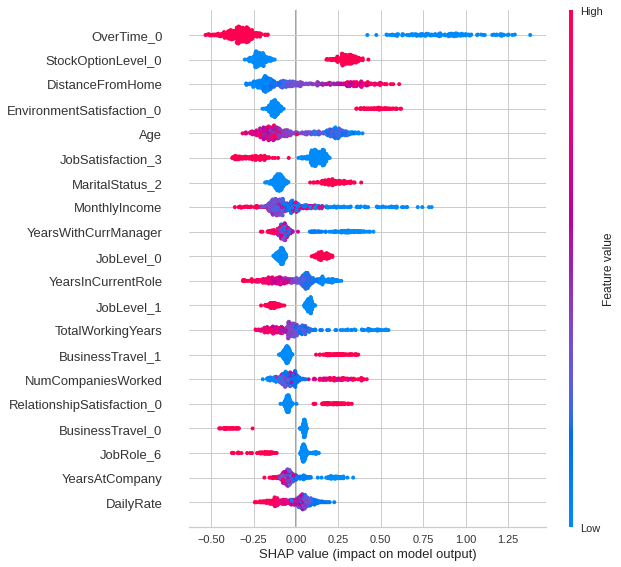

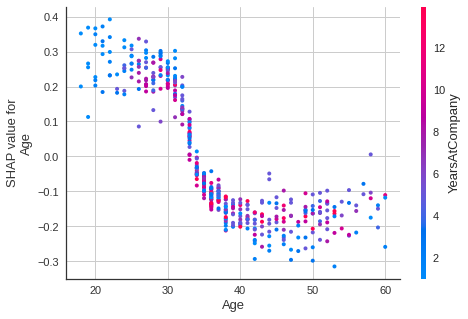

In [46]:
# create a model
catboost = create_model('catboost')
# summary plot
interpret_model(catboost)
# correlation plot
interpret_model(catboost, plot = 'correlation')

In [48]:
interpret_model(catboost, plot = 'reason', observation = 0) 

In [49]:
# predict test / hold-out dataset
catboost_holdout_pred = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8824,0.8462,0.2879,0.7917,0.4222,0.3722,0.4319


In [50]:
predictions = predict_model(catboost, data = Data_Day)
predictions

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label,Score
0,41.0,1,2,1102.0,2,1.0,1,1,1.0,1,0,94.0,2,1,7,3,2,5993.0,19479.0,8.0,1,11.0,0,0,0,8.0,2.0,0,6.0,4.0,0.0,5.0,1,0.8043
1,49.0,0,1,279.0,1,8.0,0,1,2.0,2,1,61.0,1,1,6,1,1,5130.0,24907.0,1.0,0,23.0,1,3,1,10.0,3.0,2,10.0,7.0,1.0,7.0,0,0.9893
2,37.0,1,2,1373.0,1,2.0,1,4,4.0,3,1,92.0,1,0,2,2,2,2090.0,2396.0,6.0,1,15.0,0,1,0,7.0,3.0,2,0.0,0.0,0.0,0.0,1,0.8935
3,33.0,0,1,1392.0,1,3.0,3,1,5.0,3,0,56.0,2,0,6,2,1,2909.0,23159.0,1.0,1,11.0,0,2,0,8.0,3.0,2,8.0,7.0,3.0,0.0,0,0.9120
4,27.0,0,2,591.0,1,2.0,0,3,7.0,0,1,40.0,2,0,2,1,1,3468.0,16632.0,1.0,0,12.0,0,3,1,6.0,3.0,2,2.0,2.0,2.0,2.0,0,0.9484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,0,1,884.0,1,23.0,1,3,2061.0,2,1,41.0,3,1,2,3,1,2571.0,12290.0,4.0,0,17.0,0,2,1,17.0,3.0,2,5.0,2.0,0.0,3.0,0,0.9779
1466,39.0,0,2,613.0,1,6.0,0,3,2062.0,3,1,42.0,1,2,0,0,1,9991.0,21457.0,4.0,0,15.0,0,0,1,9.0,2.0,2,7.0,7.0,1.0,7.0,0,0.9803
1467,27.0,0,2,155.0,1,4.0,2,1,2064.0,1,1,87.0,3,1,4,1,1,6142.0,5174.0,1.0,1,20.0,1,1,1,6.0,2.0,2,6.0,2.0,0.0,3.0,0,0.9793
1468,49.0,0,1,1023.0,2,2.0,2,3,2065.0,3,1,63.0,1,1,7,1,1,5390.0,13243.0,2.0,0,14.0,0,3,0,17.0,3.0,1,9.0,6.0,0.0,8.0,0,0.9706
